In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
list_data = []

for n in range(1, 32):
  list_data.append(json.load(open("({}).json".format(n),"rb")))

In [ ]:
df = pd.DataFrame()

for x in range(0,31):
  teste = list_data[x]
  teste = pd.json_normalize(teste)[["summaries", "tags.com.nike.weather", "tags.com.nike.name"]]

  prov = pd.json_normalize(teste.summaries[0])
  prov['metric_all'] = prov.metric+'_'+prov.summary

  final = prov[['metric_all', 'value']].T
  final = final.reset_index(drop=True)
  final.columns = final.iloc[0]
  final = final.tail(1).reset_index(drop=True)

  final['clima'] = teste["tags.com.nike.weather"]
  final['dia'] = teste["tags.com.nike.name"]

  df = df.append(final).reset_index(drop=True)

In [ ]:
df.distance_total = round(df.distance_total.astype(float),2)
df.speed_mean = round(df.speed_mean.astype(float),2)
df.nikefuel_mean = round(df.nikefuel_mean.astype(float),2)
df.pace_mean = round(df.pace_mean.astype(float),2)
df.nikefuel_total = round(df.nikefuel_total.astype(float),2)
df.descent_total = round(df.descent_total.astype(float),2)
df.calories_total = round(df.calories_total.astype(float),2)
df.ascent_total = round(df.ascent_total.astype(float),2)

df.dia = pd.to_datetime(df.dia, format='%d/%m/%Y')

df.steps_total = df.steps_total.astype(float)

In [ ]:
df.sort_values('dia', ascending=True, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
#transformando pace
df['pace_real'] = df.pace_mean.apply(int) + (round(((df.pace_mean - 
                                                     df.pace_mean.apply(int)) * 60),0) / 100)

df['pace_all_mean'] = round(df.pace_real.mean(),2)
df['distance_all_mean'] = round(df.distance_total.mean(),2)
df['dia_diff'] = df.dia.diff().dt.days

In [ ]:
df.head()

,pace_mean,speed_mean,nikefuel_total,calories_total,ascent_total,descent_total,distance_total,nikefuel_mean,clima,dia,steps_total,pace_real,pace_all_mean,distance_all_mean,dia_diff
0,7.07,8.49,2131.12,437.22,10.57,15.03,8.06,37.41,clear-day,2020-06-13,NaN,7.04,6.24,5.81,NaN
1,6.69,8.96,2122.51,443.69,17.52,21.15,8.04,39.46,partly-cloudy-day,2020-06-16,NaN,6.41,6.24,5.81,3.0
2,6.51,9.21,2639.40,556.74,17.85,19.25,10.05,40.34,clear-day,2020-06-20,NaN,6.31,6.24,5.81,4.0
3,6.34,9.46,1322.78,280.16,3.07,3.56,5.03,41.47,partly-cloudy-day,2020-06-25,NaN,6.20,6.24,5.81,5.0
4,6.32,9.49,1853.19,391.74,15.05,10.05,7.03,41.69,partly-cloudy-day,2020-06-28,NaN,6.19,6.24,5.81,3.0


In [ ]:
print('Período:', (df.dia.max() - df.dia.min()).days, 'dias')
print('Total corridas:', len(df), 'corridas')
print('Km corridos:', df.distance_total.sum())
print('Intervalo corridas (média - excluindo perídodo doente):', round(df.loc[df.dia_diff != 20].dia_diff.mean(),2), 'dias')
print('Intervalo corridas (média):', round(df.dia_diff.mean(),2), 'dias')
print('Pace médio (todas as corridas):', round(df.pace_real.mean(),2))
print('Distância média (todas as corridas):', round(df.distance_total.mean(),2))
print('Total calorias:', round(df.calories_total.sum(),2))

Período: 137 dias
Total corridas: 31 corridas
Km corridos: 180.01
Intervalo corridas (média - excluindo perídodo doente): 4.03 dias
Intervalo corridas (média): 4.57 dias
Pace médio (todas as corridas): 6.24
Distância média (todas as corridas): 5.81
Total calorias: 9981.89


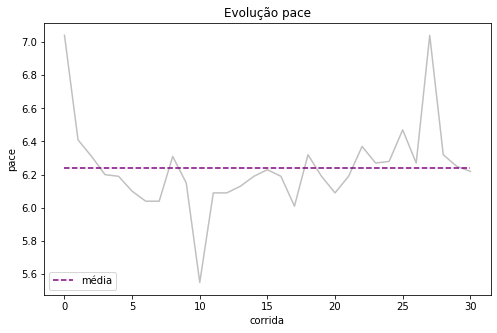

In [ ]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver')
plt.plot(df.pace_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução pace")
plt.xlabel("corrida")
plt.ylabel("pace")
plt.legend()


plt.show()

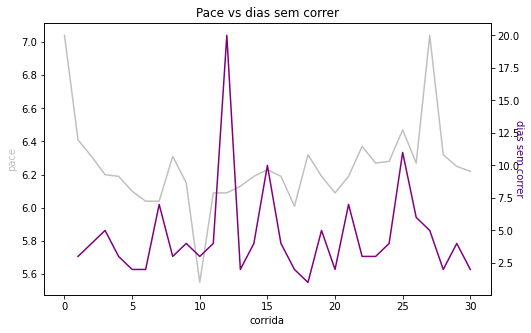

In [ ]:
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(df.index, df.pace_real, color='silver')
ax.set_xlabel('corrida')
ax.set_ylabel('pace',color='silver')

ax2=ax.twinx()
ax2.plot(df.index, df.dia_diff,color='purple')
ax2.set_ylabel('dias sem correr',color='indigo', rotation=270)

plt.title('Pace vs dias sem correr')
plt.show()

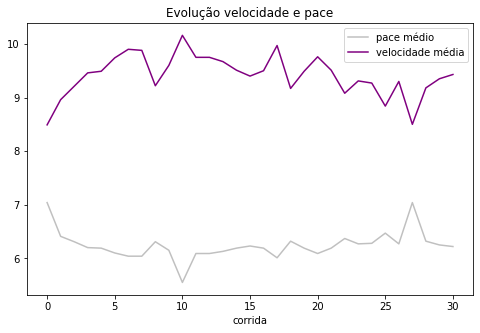

In [ ]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver', label='pace médio')
plt.plot(df.speed_mean, color='purple', label = 'velocidade média')
plt.title("Evolução velocidade e pace")
plt.xlabel("corrida")
plt.legend()


plt.show()

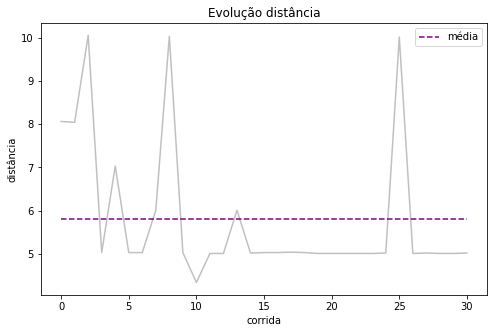

In [ ]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.distance_total, color='silver')
plt.plot(df.distance_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução distância")
plt.xlabel("corrida")
plt.ylabel("distância")
plt.legend()


plt.show()

No handles with labels found to put in legend.


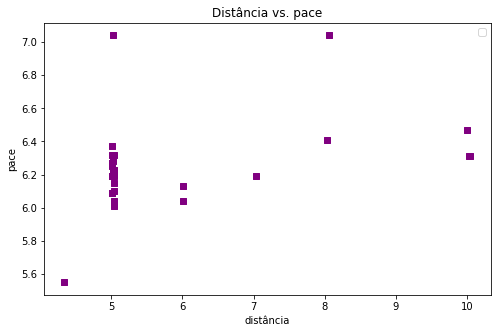

In [ ]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.pace_real, color='purple', marker='s')
plt.title("Distância vs. pace")
plt.xlabel("distância")
plt.ylabel("pace")
plt.legend()


plt.show()

No handles with labels found to put in legend.


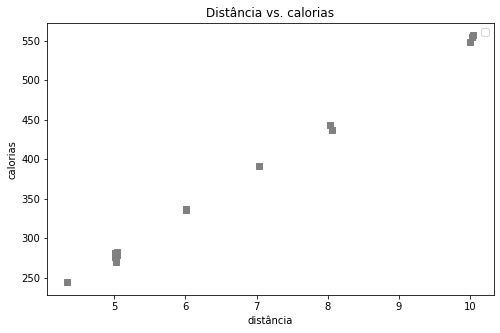

In [ ]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.calories_total, color='grey', marker='s')
plt.title("Distância vs. calorias")
plt.xlabel("distância")
plt.ylabel("calorias")
plt.legend()


plt.show()

No handles with labels found to put in legend.


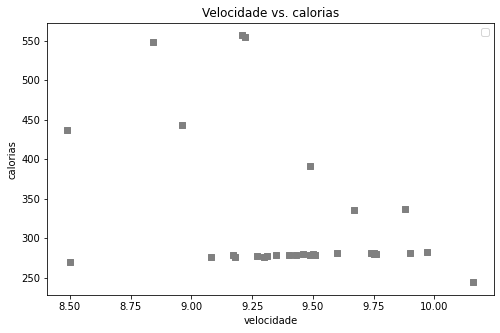

In [ ]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.speed_mean, df.calories_total, color='grey', marker='s')
plt.title("Velocidade vs. calorias")
plt.xlabel("velocidade")
plt.ylabel("calorias")
plt.legend()


plt.show()

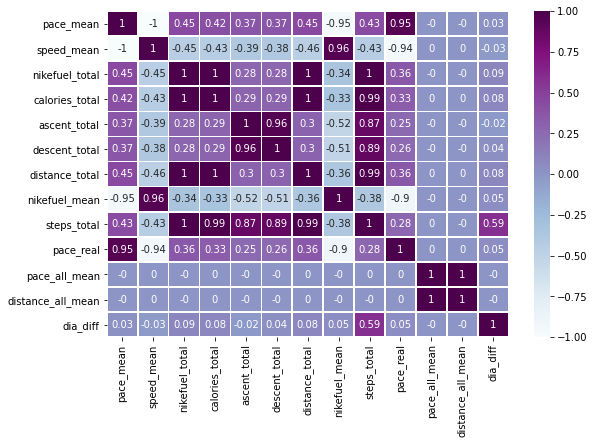

In [ ]:
fig = plt.figure(figsize=(9, 6))
sns.heatmap(round(df.corr(),2), annot=True, linewidths=.7, cmap='BuPu')

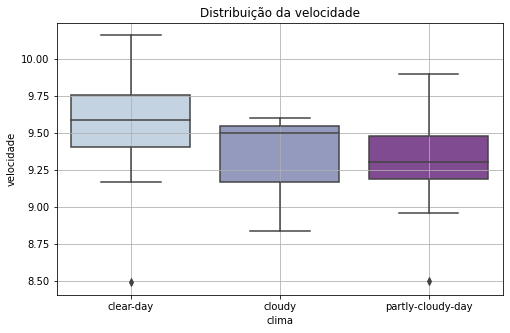

In [ ]:
pivot_clima = df[['speed_mean','clima']]
pivot_clima = pivot_clima.pivot(columns='clima', values='speed_mean')

fig = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=pivot_clima, orient="v", palette="BuPu")
plt.ylabel("velocidade")
plt.title("Distribuição da velocidade")
ax.grid()

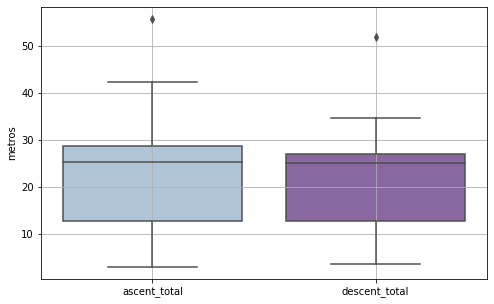

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df[['ascent_total','descent_total']], orient="v", palette="BuPu")
plt.ylabel("metros")
ax.grid()